In [1]:
import json
import pandas as pd
import string
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.core.templates import JS_RESOURCES
from bokeh.embed import components
from bokeh.layouts import column
from bokeh.models import (
    ColumnDataSource, Plot, Circle, Range1d,
    LinearAxis, HoverTool, Text, HoverTool,
    SingleIntervalTicker, Slider, CustomJS)
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, ColumnDataSource
from bokeh.resources import CDN

from bokeh.io import output_notebook, show
output_notebook()


Loading BokehJS ...

In [344]:
fake_array = np.full(shape = (2,4), fill_value=None, dtype = object)
print fake_array
fake_array[1,3] = 2
print fake_array

[[None None None None]
 [None None None None]]
[[None None None None]
 [None None None 2]]


In [281]:
def get_team_members(teamname):
    return [name for name, teamnames in credits_by_teams if teamname in teamnames]

In [285]:
with open('movies.json','rb') as infile:
    movie_dicts = json.load(infile)
    
title, budget, gross, studio, rating, num_ratings, release_year = [], [], [], [], [], [], []
all_credits, directors, writers, producers, sound, artists = [], [], [], [], [], []
special_effects, visual_effects, animators, music = [], [], [], []

for movie in movie_dicts:
    
    if movie["title"] and int(movie["release_year"]) > 1979:
        title.append(movie["title"])
        release_year.append(int(movie["release_year"]))
           
        if movie["production_co"]:
            movie["production_co"] = movie["production_co"].replace('\n','')
            
        if (movie["production_co"] == "Pixar Animation Studios") or (
            movie["production_co"] == "Walt Disney Pictures") or (
            movie["production_co"] == "DreamWorks Animation") or (
            movie["production_co"] == "Toei Animation") or (
            movie["production_co"] == "Madhouse"):
                                                                        
            studio.append(movie["production_co"])
        else:
            studio.append("Other")
            
        if movie["rating"] is None:
            movie["rating"] = 0            
        rating.append(float(movie["rating"]))

        if movie["num_ratings"]:
            movie["num_ratings"] = int(movie["num_ratings"].replace(',',''))
        elif movie["num_ratings"] is None:
            movie["num_ratings"]=0
        num_ratings.append(movie["num_ratings"])
            
        all_credits.append(len(movie["full_credits"]))
        
        if movie["budget"]:
            movie["budget"] = movie["budget"].replace('\n','')
            movie["budget"] = movie["budget"].replace(',','')
        budget.append(movie["budget"])
    
        if movie["gross"]:
            movie["gross"] = movie["gross"].replace('\n','')
            movie["gross"] = movie["gross"].replace(',','')
        gross.append(movie["gross"]) 
        
        credits_by_teams = movie["credits_by_teams"]
        writers.append(len(get_team_members("Writing Credits")))
        directors.append(len(get_team_members("Directed by")))
        producers.append(len(get_team_members("Produced by")))
        special_effects.append(len(get_team_members("Special Effects by")))
        visual_effects.append(len(get_team_members("Visual Effects by")))
        animators.append(len(get_team_members("Animation Department")))
        artists.append(len(get_team_members("Art Department")))

In [338]:
movie_df = pd.DataFrame({'title': title, 'Studio': studio, 'Year': release_year,'num_crew': all_credits, 
                       'rating': rating, 'num_ratings': num_ratings, 'writers': writers,
                        'directors': directors, 'producers': producers, 'special_fx': special_effects,
                        'visual_fx': visual_effects, 'animators': animators, 'artists': artists})
crew_df = pd.pivot_table(movie_df, values='num_crew', index=['Studio'], columns=['Year'], aggfunc=np.mean)
rating_df = pd.pivot_table(movie_df, values='rating', index=['Studio'], columns=['Year'], aggfunc=np.mean)
num_ratings_df = pd.pivot_table(movie_df, values='num_ratings', index=['Studio'], columns=['Year'], aggfunc=np.mean)

animators_df = pd.pivot_table(movie_df, values='animators', index=['title'], columns=['Year'])
visuals_df = pd.pivot_table(movie_df, values='visual_fx', index=['Studio'], columns=['Year'], aggfunc=np.mean)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,,,,,,,,,,,,,,,,,,,,,
$9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
009 Re: Cyborg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Bahadur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
"31 minutos, la película",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5 Centimeters Per Second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6 Angels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beating Heart and Cracked Ceiling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
A Bug's Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
movie_df

,Studio,Year,animators,artists,directors,num_crew,num_ratings,producers,rating,special_fx,title,visual_fx,writers
0,Other,1980,67,1,0,100,1542,3,6.8,2,Animalympics,3,5
1,Other,1980,28,4,0,38,98,1,7.2,0,Yamato yo towa ni,0,5
2,Other,1980,1,0,0,3,38,1,6.9,0,Krvavá pani,0,0
3,Other,1980,25,0,1,39,2113,2,7.3,0,"Bon Voyage, Charlie Brown (and Don't Come Back...",0,3
4,Other,1980,0,0,0,2,76,0,6.1,0,Cyborg 009: Legend of the Super Galaxy,0,1
5,Other,2011,0,1,0,16,13,10,5.9,1,Crimson: The Motion Picture,0,0
6,Other,2015,0,0,1,3,0,1,0.0,0,Onnum Onnum Moonnu,0,1
7,Other,2018,5,4,1,27,0,3,0.0,0,Troll Hunters,9,2
8,Other,1980,64,1,0,80,3376,0,8.0,0,The King and the Mockingbird,2,4
9,Other,1980,0,0,0,0,0,0,0.0,0,Il Trenino nel Pianeta Favola,0,0


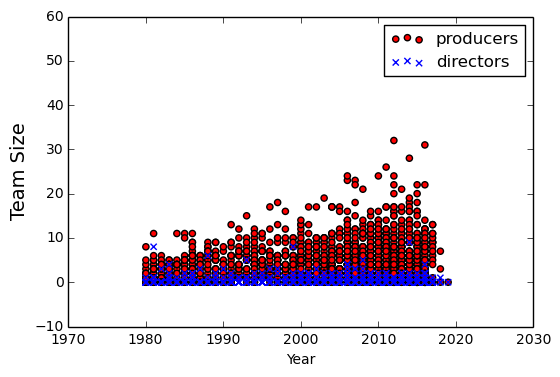

In [326]:
ax = movie_df.plot(x="Year", y='producers', kind='scatter', marker='o', color='r', label = "producers")
movie_df.plot(x="Year", y='directors', kind='scatter', marker='x', ax=ax, label = "directors")
plt.ylabel('Team Size', fontsize=14)

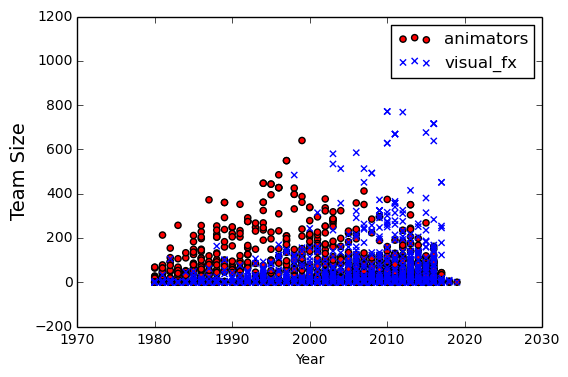

In [308]:
ax = movie_df.plot(x="Year", y='animators', kind='scatter', marker='o', color='r', label = "animators")
movie_df.plot(x="Year", y='visual_fx', kind='scatter', marker='x', ax=ax, label = "visual_fx")
plt.ylabel('Team Size', fontsize=14)

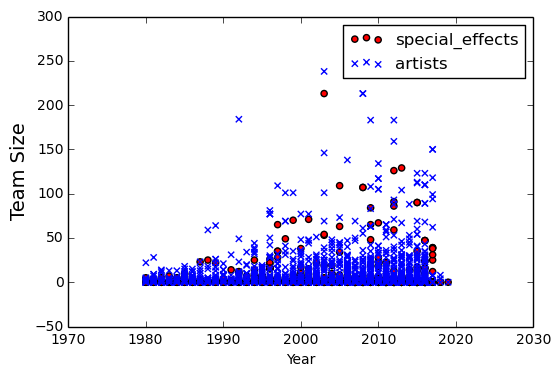

In [329]:
ax = movie_df.plot(x="Year", y='special_fx', kind='scatter', marker='o', color='r', label = "special_effects")
movie_df.plot(x="Year", y='artists', kind='scatter', marker='x', ax=ax, label = "artists")
plt.ylabel('Team Size', fontsize=14)

In [317]:
def _process_data():
    from bokeh.sampledata.gapminder import fertility, life_expectancy, population, regions

    # Make the column names ints not strings for handling
    columns = list(fertility.columns)
    years = list(range(int(columns[0]), int(columns[-1])))
    rename_dict = dict(zip(columns, years))

    fertility = fertility.rename(columns=rename_dict)
    life_expectancy = life_expectancy.rename(columns=rename_dict)
    population = population.rename(columns=rename_dict)
    regions = regions.rename(columns=rename_dict)

    # Turn population into bubble sizes. Use min_size and factor to tweak.
    scale_factor = 200
    population_size = np.sqrt(population / np.pi) / scale_factor
    min_size = 3
    population_size = population_size.where(population_size >= min_size).fillna(min_size)

    # Use pandas categories and categorize & color the regions
    regions.Group = regions.Group.astype('category')
    #regions_list = list(regions.Group.cat.categories)
    
    regions_list = ["producers", "directors", "animators",
                   "visual_fx", "special_fx", "artists"]
    #def get_color(r):
    #    return Spectral6[regions_list.index(r.Group)]
    #regions['region_color'] = regions.apply(get_color, axis=1)

    return fertility, life_expectancy, population_size, regions, years, regions_list

In [318]:
#regions = ["Pixar Animation Studios", "Walt Disney Pictures", "DreamWorks Animation",
#                    "Toei Animation", "Madhouse", "Other"]
regions = ["producers", "directors", "animators",
                   "visual_fx", "special_fx", "artists"]
regions_df = pd.DataFrame(index=regions, data={'Group': regions,'ID': regions, 
                       'region_color': ['#d53e4f', '#fc8d59', '#fee08b', '#3288bd', '#e6f598', '#99d594']})
regions_df.head()

,Group,ID,region_color
producers,producers,producers,#d53e4f
directors,directors,directors,#fc8d59
animators,animators,animators,#fee08b
visual_fx,visual_fx,visual_fx,#3288bd
special_fx,special_fx,special_fx,#e6f598


In [2]:
import plot_movies
def make_interactive_plot():
    #fertility_df, life_expectancy_df, population_df_size, regions_df, years, regions = _process_data()
    fertility_df, life_expectancy_df, population_df_size, regions_df, years, regions = plot_movies.process_data()
    
#     fertility_df = visuals_df
#     life_expectancy_df = animators_df 
#     population_df_size = rating_df
#     regions_df = pd.DataFrame(index=regions, data={'Group': regions,'ID': regions, 
#                        'region_color': ['#d53e4f', '#fc8d59', '#fee08b', '#3288bd', '#e6f598', '#99d594']})    

#     years = release_year
#     regions = ["producers", "directors", "animators",
#                    "visual_fx", "special_fx", "artists"]
    
    sources = {}

    #region_color = regions_df['region_color']
    #region_color.name = 'region_color'

    for year in years:
        # NOTE(irene): added following two lines
        region_color = regions_df[year]
        region_color.name = 'region_color'
        
        fertility = fertility_df[year]
        fertility.name = 'fertility'
        life = life_expectancy_df[year]
        life.name = 'life'
        population = population_df_size[year]
        population.name = 'population'
        new_df = pd.concat([fertility, life, population, region_color], axis=1)
        sources['_' + str(year)] = ColumnDataSource(new_df)

    dictionary_of_sources = dict(zip([x for x in years], ['_%s' % x for x in years]))
    js_source_array = str(dictionary_of_sources).replace("'", "")

    xdr = Range1d(-50, 800)
    ydr = Range1d(-50, 800)
    plot = Plot(
        x_range=xdr,
        y_range=ydr,
        plot_width=800,
        plot_height=400,
        outline_line_color=None,
        toolbar_location=None,
        sizing_mode="scale_width",
    )
    AXIS_FORMATS = dict(
        minor_tick_in=None,
        minor_tick_out=None,
        major_tick_in=None,
        major_label_text_font_size="10pt",
        major_label_text_font_style="normal",
        axis_label_text_font_size="10pt",

        axis_line_color='#AAAAAA',
        major_tick_line_color='#AAAAAA',
        major_label_text_color='#666666',

        major_tick_line_cap="round",
        axis_line_cap="round",
        axis_line_width=1,
        major_tick_line_width=1,
    )

    xaxis = LinearAxis(ticker=SingleIntervalTicker(interval=100), axis_label="Children per woman (total fertility)", **AXIS_FORMATS)
    yaxis = LinearAxis(ticker=SingleIntervalTicker(interval=100), axis_label="Life expectancy at birth (years)", **AXIS_FORMATS)
    plot.add_layout(xaxis, 'below')
    plot.add_layout(yaxis, 'left')

    # ### Add the background year text
    # We add this first so it is below all the other glyphs
    text_source = ColumnDataSource({'year': ['%s' % years[0]]})
    text = Text(x=2, y=35, text='year', text_font_size='150pt', text_color='#EEEEEE')
    plot.add_glyph(text_source, text)

    # Add the circle
    renderer_source = sources['_%s' % years[0]]
    circle_glyph = Circle(
        x='fertility', y='life', size='population',
        fill_color='region_color', fill_alpha=0.8,
        line_color='#7c7e71', line_width=0.5, line_alpha=0.5)
    circle_renderer = plot.add_glyph(renderer_source, circle_glyph)

    # Add the hover (only against the circle and not other plot elements)
    tooltips = "@index"
    plot.add_tools(HoverTool(tooltips=tooltips, renderers=[circle_renderer]))

    # Add the legend
    text_x = 500
    text_y = 500
    for i, region in enumerate(regions):
        plot.add_glyph(Text(x=text_x, y=text_y, text=[region], text_font_size='10pt', text_color='#666666'))
        plot.add_glyph(Circle(x=text_x - 5, y=text_y + 25, fill_color=Spectral6[i], size=10, line_color=None, fill_alpha=0.8))
        text_y = text_y - 50

    # Add the slider
    code = """
        var year = slider.get('value'),
            sources = %s,
            new_source_data = sources[year].get('data');
        renderer_source.set('data', new_source_data);
        text_source.set('data', {'year': [String(year)]});
    """ % js_source_array

    callback = CustomJS(args=sources, code=code)
    slider = Slider(start=years[0], end=years[-1], value=1, step=1, title="Year", callback=callback, name='testy')
    callback.args["renderer_source"] = renderer_source
    callback.args["slider"] = slider
    callback.args["text_source"] = text_source

    # Lay it out
    return column(plot, slider)

show(make_interactive_plot())